In [2]:
%matplotlib inline

import warnings
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import random
from collections import Counter, namedtuple
from math import log

In [3]:
fake1 = np.linspace(0, 40, 40, dtype=int)
fake2 = fake1.copy()

replace_at = np.random.randint(0, 40, size=1)
for i in range(0, len(fake1)): # Replacing random elements in the uniform distribution
    if(i in replace_at):
        fake1[i] = np.random.randint(0, 40)
print(fake1)

fake2 = np.linspace(0, 40, 40, dtype=int)
replace_at = np.random.randint(0, 40, size=1)
for i in range(0, len(fake2)): # Replacing random elements in the uniform distribution
    if(i in replace_at):
        fake2[i] = np.random.randint(0, 40)
print(fake2)
# mini_fake1 = random.sample(fake1, 10)
# print(mini_fake1)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 30 27 28 29 30 31 32 33 34 35 36 37 38 40]
[ 0  1  2  3  4  5  1  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 40]


In [4]:
def kl_div_scipy(p,q):
    p = np.asarray(p, dtype=np.float)
    q = np.asarray(q, dtype=np.float)

#     return np.sum(np.where(p != 0, p * np.log(p / q), 0))
    return st.entropy(p,q)

In [5]:
kl_div_scipy(fake1,fake2)

0.007632601285636479

In [28]:
def my_kl_divergence(p,q):
    """ Returns Kl Divergence of two integer lists. Theory at https://www.countbayesie.com/blog/2017/5/9/kullback-leibler-divergence-explained
    :type p: List[int]
    :type q: List[int]
    :rtype: double
    """
    cf1, l1 = Counter(p), len(p)
    cf2, l2 = Counter(q), len(q)
    
    print("Initial Lengths cf1 {0} , cf2 {1}".format(len(cf1),len(cf2)))
    # Pre-processing for using KL Divergence of Frequency Counters cf1 and cf2
    s = set(cf1.keys())
    s = s.intersection(cf2.keys()) # Collecting all unique elements in cf1 and cf2

    # Normalizing the series to reflect probabilities of occurence
    for e in list(cf1): # Since we can't iterate over a mutable collection undergoing change
        if e in s:
            cf1[e] = float(cf1[e]/l1)
        else:
            cf1.pop(e, None)
    for f in list(cf2):
        if f in s:
            cf2[f] = float(cf2[f]/l2)
        else:
            cf2.pop(f, None)
    print(s)
    print("Lengths cf1 {0} , cf2 {1}".format(len(cf1),len(cf2)))
    print(cf1.keys())
    print(cf2.keys())
    print("Kl Div from library func = {0}".format(kl_div_scipy(list(cf1.values()),list(cf2.values()))))
    kl_div = 0.0
    for c in s: # For each unique element in both series
        if cf1[c] != 0 and cf2[c] != 0:
            t = cf1[c] * log(cf1[c]/cf2[c])
#             print("cf1[{0}]={1} cf2[{0}]={2} t={3} k={4}".format(c, cf1[c], cf2[c], t, kl_div))
            kl_div += t 
            
#             t2 = cf2[c] * log(cf2[c]/cf1[c])
#             print("cf2[{0}]={1} cf1[{0}]={2} t2={3} k={4}".format(c, cf2[c], cf1[c], t2, kl_div))
#             kl_div += t2 
    return kl_div

In [29]:
my_kl_divergence(fake1, fake2)

Initial Lengths cf1 39 , cf2 39
{0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 40}
Lengths cf1 38 , cf2 38
dict_keys([0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 40])
dict_keys([0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 40])
Kl Div from library func = 0.017773004629742187


0.01732867951399863

In [28]:
data = fake1 # TODO Do not use this code. This compares distributions through MLE minimization
# Testing KL Divergence with a standard distribution
DISTRIBUTIONS = [st.uniform, st.norm, st.invgauss]
for distribution in DISTRIBUTIONS:
    # fit dist to data
    params = distribution.fit(data)
    print("Dist: {0}. Parameters: {1}".format(distribution, params))

# Distribution.fit uses scipy.stats._continuous_distns.py --(uses)--> scipy.stats._distn_infrastructure.rv_continuous.fit() --(uses)--> scipy.optimize.optimize.fmin()

Dist: <scipy.stats._continuous_distns.uniform_gen object at 0x0000020B54F70630>. Parameters: (-8.1023135726204418e-05, 40.000112658252455)
Dist: <scipy.stats._continuous_distns.norm_gen object at 0x0000020B54EE8588>. Parameters: (19.975000000000001, 11.826849749616336)
Dist: <scipy.stats._continuous_distns.invgauss_gen object at 0x0000020B54D57B00>. Parameters: (0.041778322959500291, -40.299895633517608, 1437.9384843915818)


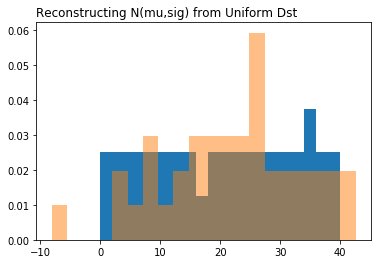

ValueError: qk and pk must have same length.

In [45]:
dst = fake1

mu, sigma = np.mean(dst), np.std(dst)
s = np.random.normal(mu, sigma, len(dst)) # TODO How many points to sample ?
plt.hist(dst, bins=20, normed=True);
plt.hist(s, alpha=0.5, bins=20, normed=True);
plt.title('Reconstructing N(mu,sig) from Uniform Dst',loc='left')
plt.show();
print("Kl Div = {0}".format(kl_divergence(dst, s)))

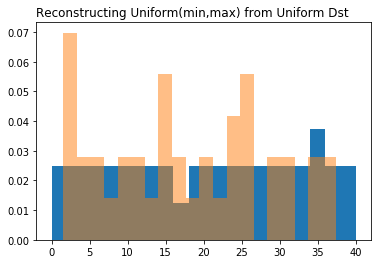

In [36]:
dst = fake1

dst_min, dst_max = np.min(dst), np.max(dst)

u = np.random.uniform(dst_min, dst_max, len(dst)) # TODO How many points to sample ?
plt.hist(dst, bins=20, normed=True);
plt.hist(u, alpha=0.5, bins=20, normed=True);
plt.title('Reconstructing Uniform(min,max) from Uniform Dst',loc='left')
plt.show();

In [37]:
u

array([ 22.27020852,  37.31906519,   6.38103346,  26.24705739,
         6.06706806,  10.36817966,   2.46220754,   4.25521685,
        25.15386281,  33.86870735,   3.01521225,  11.64356121,
        12.12255479,   1.72882368,  20.52391527,  21.15483352,
        35.54162443,  31.02544475,  28.9519159 ,  18.77832111,
        23.69350088,  15.65705265,   7.502917  ,   5.08165556,
        15.39395285,  14.5904142 ,  23.39453704,  14.15356548,
        31.25407918,  16.66038578,   1.86086869,  12.39964977,
         9.75118631,  16.91172413,   1.50836531,  25.58852872,
        34.47408056,  29.70349432,  24.58780352,  25.81816028])